In [66]:
from bs4 import BeautifulSoup
import easygui as gui
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.graph_objs import *
%matplotlib notebook

In [10]:
df=pd.read_csv('peopleWithGender_.csv')
df

,Unnamed: 0,Unnamed: 0.1,Sl. No.,Name,E-mail,Designation,Institute,Extension,Group,Picture,Unnamed: 8,username,uName,url,gender
0,488,0,1,Achyuth Acharya,aacharya@ccamp.res.in,Technology Assistant,C-CAMP,6001,Staff Contract Staff,\n \n,NaN,aacharya,Achyuth Acharya,https://intranet.ncbs.res.in/user/3263,Mr.
1,888,1,2,Aparna Agarwal,aagarwal@ncbs.res.in,RESEARCH SCHOLAR (INT PHD),NCBS,6515,Academic Research Scholars Integrated PhD 2012...,\n \n,NaN,aagarwal,Aparna Agarwal,https://intranet.ncbs.res.in/user/284,Ms.
2,379,2,3,Aalok J Varma,aalokjv@ncbs.res.in,RESEARCH SCHOLAR (Int Phd),NCBS,6515,Academic Research Scholars Integrated PhD 2015...,\n \n,NaN,aalokjv,Aalok J Varma,https://intranet.ncbs.res.in/user/286,Mr.
3,891,3,4,Aanchal J Bhatia,aanchalb@ncbs.res.in,RESEARCH SCHOLAR (INT PHD),NCBS,6520,Academic Research Scholars Integrated PhD 2012...,\n \n,NaN,aanchalb,Aanchal J Bhatia,https://intranet.ncbs.res.in/user/229,Ms.
4,733,4,5,Aarshiya Rai,aarshiyarai@instem.res.in,TRAINEE,inStem,6803,Academic Intern Dr. Muralidhara Padigaru,\n \n,NaN,aarshiyarai,Aarshiya Rai,https://intranet.ncbs.res.in/user/3513,Ms.
5,226,5,6,Ashaq Hussain Najar,aashiqh@ncbs.res.in,JUNIOR RESEARCH FELLOW,NCBS,6051,Academic Junior Research Fellow Dr. Mitradas M...,\n \n,NaN,aashiqh,Ashaq Hussain Najar,https://intranet.ncbs.res.in/user/288,Mr.
6,898,6,7,Aastha Kumari,aasthak@ncbs.res.in,RESEARCH SCHOLAR (INT PHD),NCBS,6605,Academic Research Scholars Integrated PhD 2014...,\n \n,NaN,aasthak,Aastha Kumari,https://intranet.ncbs.res.in/user/289,Ms.
7,166,7,8,Abhik Dutta,abhikd@instem.res.in,Intern,inStem,6703,Academic Dr. Colin Jamora,\n \n,NaN,abhikd,Abhik Dutta,https://intranet.ncbs.res.in/user/1646,Mr.
8,243,8,9,Abhinav Tyagi,abhinavt@ncbs.res.in,JUNIOR RESEARCH FELLOW,NCBS,6031,Academic Junior Research Fellow Dr. Uma Ramakr...,\n \n,NaN,abhinavt,Abhinav Tyagi,https://intranet.ncbs.res.in/user/292,Mr.
9,211,9,10,Abhinav Yadav,abhinavy@ncbs.res.in,Junior Research Fellow,NCBS,6509,Academic Junior Research Fellow Dr. Axel Brock...,\n \n,NaN,abhinavy,Abhinav Yadav,https://intranet.ncbs.res.in/user/1374,Mr.


In [13]:
#Scrubbing by replacing redundant and ambiguos entries
df.Institute.replace('ccamp','C-CAMP',inplace=True)

df['gender_']=df.gender.replace('Mrs.', 'Female')
df.gender_.replace('Mr.','Male',inplace=True)
df.gender_.replace('Ms.','Female',inplace=True)
df.gender_.replace('m','Male',inplace=True)
df.gender_.replace('f','Female',inplace=True)

# df.gender_.replace('Dr.',np.nan,inplace=True)
# df.gender_.replace('Prof.',np.nan,inplace=True)
# df.gender.dropna()


In [14]:
#add position column
def f(x):
    if ('Postdocs' in x['Group']): return 'Postdocs'
    elif ('Academic' in x['Group']): return 'Student'
    elif ('Staff' in x['Group']): return 'Staff'
    elif ('Faculty' in x['Group']): return 'Faculty'
    else: return 0

df['position']= (df.apply(lambda x: f(x), axis=1))



In [ ]:
#list of faculty names
facL=df[df['Group'].map(lambda tags: 'Faculty' in tags)].Name

#List of faculty first names
facL2=facL.str.split(' ').str[0]

#column of lab association of the individual
def f2(x):
    for fac in facL2:
        if fac in x['Group']:
            return fac

df['Lab']=(df.apply(lambda x: f2(x), axis=1))
df

In [18]:
#Aggregated counts of people grouped by position

agg=df.groupby(['position','gender_']).count()['Name'].unstack()
agg['ratio']=(100*pd.to_numeric(agg['Female'])/agg['Male']).astype(int)
agg

gender_,Female,Male,ratio
position,,,
Faculty,16,35,45
Postdocs,75,90,83
Staff,111,145,76
Student,270,290,93


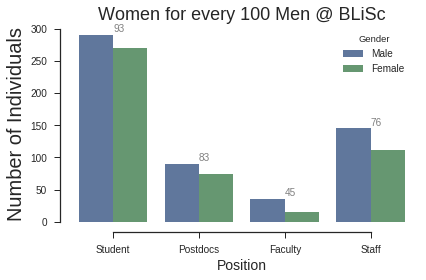

In [59]:
#Plot for women for every 100 men at BliSc

sns.set_style("ticks")
order=['Student','Postdocs','Faculty','Staff']
g=sns.countplot(hue='gender_',x='position',data=df,order=order,saturation=0.6)


#overlay number patches of women for every 100 Men
i=0
for p in g.patches:
    if (i<len(g.patches)/2):
        height = p.get_height()
        g.text(i, height+5, agg.ratio[order[i]], horizontalalignment='left', size='medium', color='grey', )
        i+=1

#Overlay fanciness
g.legend_.set_title('Gender')
g.set_ylabel("Number of Individuals",fontsize=20)
g.set_xlabel("Position",fontsize=14)
g.set_title('Women for every 100 Men @ BLiSc',fontsize=18)
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.savefig('womenPos.png',dpi=300)
plt.show()

In [43]:
agg2=df.groupby(['Institute','gender_']).count()['Name'].unstack()
agg2['ratio']=(100*pd.to_numeric(agg2['Female'])/agg2['Male']).astype(int)
agg2

gender_,Female,Male,ratio
Institute,,,
C-CAMP,24,20,120
NCBS,319,400,79
inStem,129,138,93


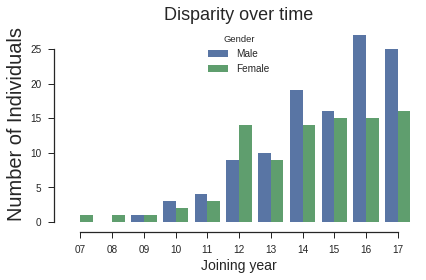

In [60]:
#plot disparity over the ages.
df['batch']=df[df.Group.map(lambda tags : 'Batch' in tags)].Group.str.split('20').str[1].str[0:2]
g3=sns.countplot(x='batch',hue='gender_',data=df)

g3.legend_.set_title('Gender')
g3.set_ylabel("Number of Individuals",fontsize=20)
g3.set_xlabel("Joining year",fontsize=14)
g3.set_title('Disparity over time',fontsize=18)
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.savefig('womenOverTime.png',dpi=300)

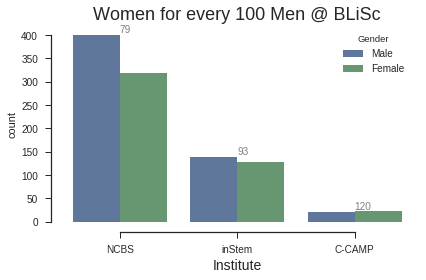

In [61]:
sns.set_style("ticks")
order2=['NCBS','inStem','C-CAMP']
g2=sns.countplot(hue='gender_',x='Institute',order=order2,data=df,saturation=0.6)

i=0
for p in g2.patches:
    if (i<len(g2.patches)/2):
        height = p.get_height()
        g2.text(i, height+5, agg2.ratio[order2[i]], horizontalalignment='left', size='medium', color='grey', )
        i+=1

g2.legend_.set_title('Gender')
g.set_ylabel("Number of Individuals",fontsize=20)
g2.set_xlabel("Institute",fontsize=14)
g2.set_title('Women for every 100 Men @ BLiSc',fontsize=18)
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.savefig('womenInstitute.png',dpi=300)

In [63]:
#Agrregate by lab and gender and measure Findex
agg3=df.groupby(['Lab','gender_']).count()['Name'].unstack()
agg3=agg3.fillna(0)
agg3['ratio']=(100*pd.to_numeric(agg3['Female'])/agg3['Male']).astype(int)
agg3['labSize']=agg3.Female+agg3.Male
agg3['Findex']=(agg3.Female-agg3.Male)/agg3.labSize
agg3['name']=agg3.index
agg3=agg3.sort('ratio',axis=0)


#Get the gender of lab supervisor
dfFaculty=df[df['Group'].map(lambda tags: 'Faculty' in tags)]
dfFaculty['sName']=dfFaculty.Name.str.split(' ').str[0]
def f2(x):
    return (dfFaculty[dfFaculty.sName==x].gender.iloc[0])
agg3['LabG']=agg3.name.apply(lambda x: f2(x))


#add gender color column
repl=dict(m='red',f='green')
agg3['labGC']=agg3.LabG.map(repl)

# agg3

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [64]:
#colormap from mpl to plotly
import matplotlib
from matplotlib import cm

magma_cmap = matplotlib.cm.get_cmap('Spectral')

magma_rgb = []
norm = matplotlib.colors.Normalize(vmin=0, vmax=255)

for i in range(0, 255):
       k = matplotlib.colors.colorConverter.to_rgb(magma_cmap(norm(i)))
       magma_rgb.append(k)
    
    
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []
    
    for k in range(pl_entries):
        C = map(np.uint8, np.array(cmap(k*h)[:3])*255)
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])
        
    return pl_colorscale

magma = matplotlib_to_plotly(magma_cmap, 255)

In [68]:
#Plotly plot of male vs female by findex and supervisor  gender

#text overlay
overlay=agg3.index+'  '+agg3.Male.astype(int).astype(str)+'M / '+ \
        agg3.Female.astype(int).astype(str)+'F    ' +agg3.Findex.round(2).astype(str)
    
    
trace1 = go.Scatter(
    #male vs female with overlay
    x = agg3.Male,
    y = agg3.Female,
    mode='markers',
    text= overlay,
    
    #outline
    
    marker=dict(
        #size and colorscaling
        size=agg3.labSize*1.32,
        color =agg3.Findex, #set color equal to a variable
        colorscale=magma,
        
        #outline by gender of supervisor
        line = dict(
            width = 3,
            color = agg3.labGC
        ),

        
        #add colorbar with annotations
        showscale=True,
        cauto = False,
        cmin = -1,
        cmax = 1,
        colorbar = dict(
            title = 'Gender Disparity Index',
            titleside = 'top',
            tickmode = 'array',
            tickvals = [-1,0,1],
            ticktext = ['All Male','Balanced','All Female'],
            ticks = 'outside',
            
        )
    )
)



layout={'shapes': [
        # Line Diagonal
        {
            'type': 'line',
            'x0': 0,
            'y0': 0,
            'x1': 20,
            'y1': 20,
            'line': {
                'color': 'rgba(128, 0, 128,0.3)',
                'width': 4,
                'dash': 'dot',
            },
        },
        
        #Male supervisor marker
         {
            'type': 'circle',
            'xref': 'paper',
            'yref': 'paper',
            'x0': 0.1,
            'y0': 0.8,
            'x1': 0.15,
            'y1': 0.85,
            'line': {
                'color': 'orange',
                'width': 3,
            },
            'fillcolor': magma[127][1],
        },
        
        #Female supervisor marker
         {
            'type': 'circle',
            'xref': 'paper',
            'yref': 'paper',
            'x0': 0.1,
            'y0': 0.7,
            'x1': 0.15,
            'y1': 0.75,
            'line': {
                'color': 'green',
                'width': 3,
            },
            'fillcolor': magma[127][1],
        },
        
        ],
        
        #Male female supervisor annotation
        'annotations':Annotations([
        Annotation(
            x=0.15,
            y=0.75,
            showarrow=False,
            text='Female Supervisor',
            xref='paper',
            yref='paper'
        ),
        Annotation(
            x=0.15,
            y=0.85,
            showarrow=False,
            text='Male Supervisor',
            xref='paper',
            yref='paper'
        )
    ]),

    #Set titles and metadata
    'title':'Gender Disparity across labs',
    'xaxis':dict(
        title='Number of Male labmembers',
         domain = [0, 20],
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='orange'
        )
    ),
    'yaxis':dict(
        title='Number of Female labmembers',
      scaleanchor = "x",
      domain = [0, 20],
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='green'
        )
    ),
        
    
    #Set size and default settings
    'autosize':False,
    'width':800,
    'height':800,
    'dragmode': 'pan',
    'hovermode' : 'closest',
   }


data = [trace1]
        
fig = {
    'data': data,
    'layout': layout,
}


py.iplot(fig, filename='scatter-plot-with-colorscale',)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: FutureWarning:

using '+' to provide set union with Indexes is deprecated, use '|' or .union()

/usr/local/lib/python2.7/dist-packages/urllib3/util/ssl_.py:137: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings

